# Transformaciones puntuales
## Fundamentos de Análisis de Imágenes

- Nombre 1: Ada Moral Merino
- Nombre 2: Lucía Martinez Miramontes
- Nombre 3: Laura García González

El objetivo de esta práctica será visualizar el histograma de una imagen e implementar algunas funciones de transformaciones puntuales y ecualización de imágenes. Primero, las librerías que se usarán son las siguientes:

In [50]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

**Ejercicio 1**: carga y visualiza la imagen ``escilum.tif``. Calcula
y muestra su histograma, por ejemplo,  con la función [``hist()``](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html) de
``matplotlib``. A la vista del histograma, discute
qué problema tiene la imagen para analizar visualmente la
región inferior izquierda.

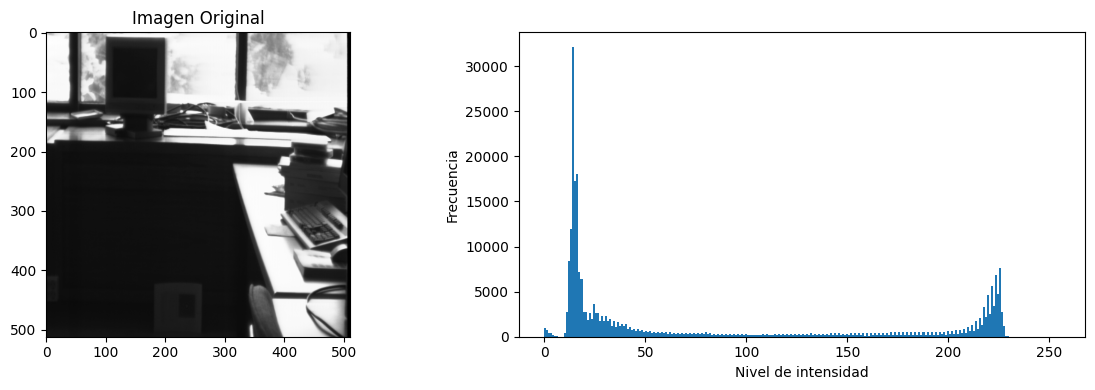

In [51]:
imagen = cv2.imread('escilum.tif', cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.imshow(imagen, cmap='gray')
plt.title('Imagen Original')

plt.subplot(1, 2, 2)
plt.hist(imagen.flatten(), bins=256, range=(0, 255))
plt.xlabel('Nivel de intensidad')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

El histograma muestra bajo contraste. Los píxeles se concentran en un rango estrecho, haciendo que la región inferior izquierda sea casi uniforme sin detalles visibles.

**Ejercicio 2**: escribe una función de transformación
puntual, ``tr_punt(img, rango_entrada, rango_salida)``, que transforme los niveles de gris de
un rango de entrada en otro de salida. Prueba con varios rangos de entrada para hacer que los píxeles de la región inferior izquierda de la imagen no estén tan agrupados en el histograma. El rango de salida puede ser siempre de [0, 255]. Pinta la imagen y el histograma resultantes.

Una forma de considerar la implementación de la función es intentar encontrar la recta que pasa por los puntos (rango_entrada[0], rango_salida[0]) y (rango_entrada[1], rango_salida[1]).

In [59]:
def tr_punt(img, rango_entrada, rango_salida):
    """
    Transforma los niveles de gris de una imagen de un rango de entrada a otro de salida.

    Argumentos:
    img (np.array): imagen de entrada (uint8)
    rango_entrada (list o tupla): [min_entrada, max_entrada]
    rango_salida (list o tupla): [min_salida, max_salida]

    Retorna:
    np.array: imagen transformada (uint8)
    """
    img_tr = img.copy().astype(np.float32)

    min_e, max_e = rango_entrada
    min_s, max_s = rango_salida

    a = (max_s - min_s) / (max_e - min_e)
    b = min_s - a * min_e

    mask = (img >= min_e) & (img <= max_e)
    img_tr[mask] = a * img[mask] + b

    # Limitar los valores a [0, 255]
    img_tr = np.clip(img_tr, 0, 255).astype(np.uint8)

    return img_tr

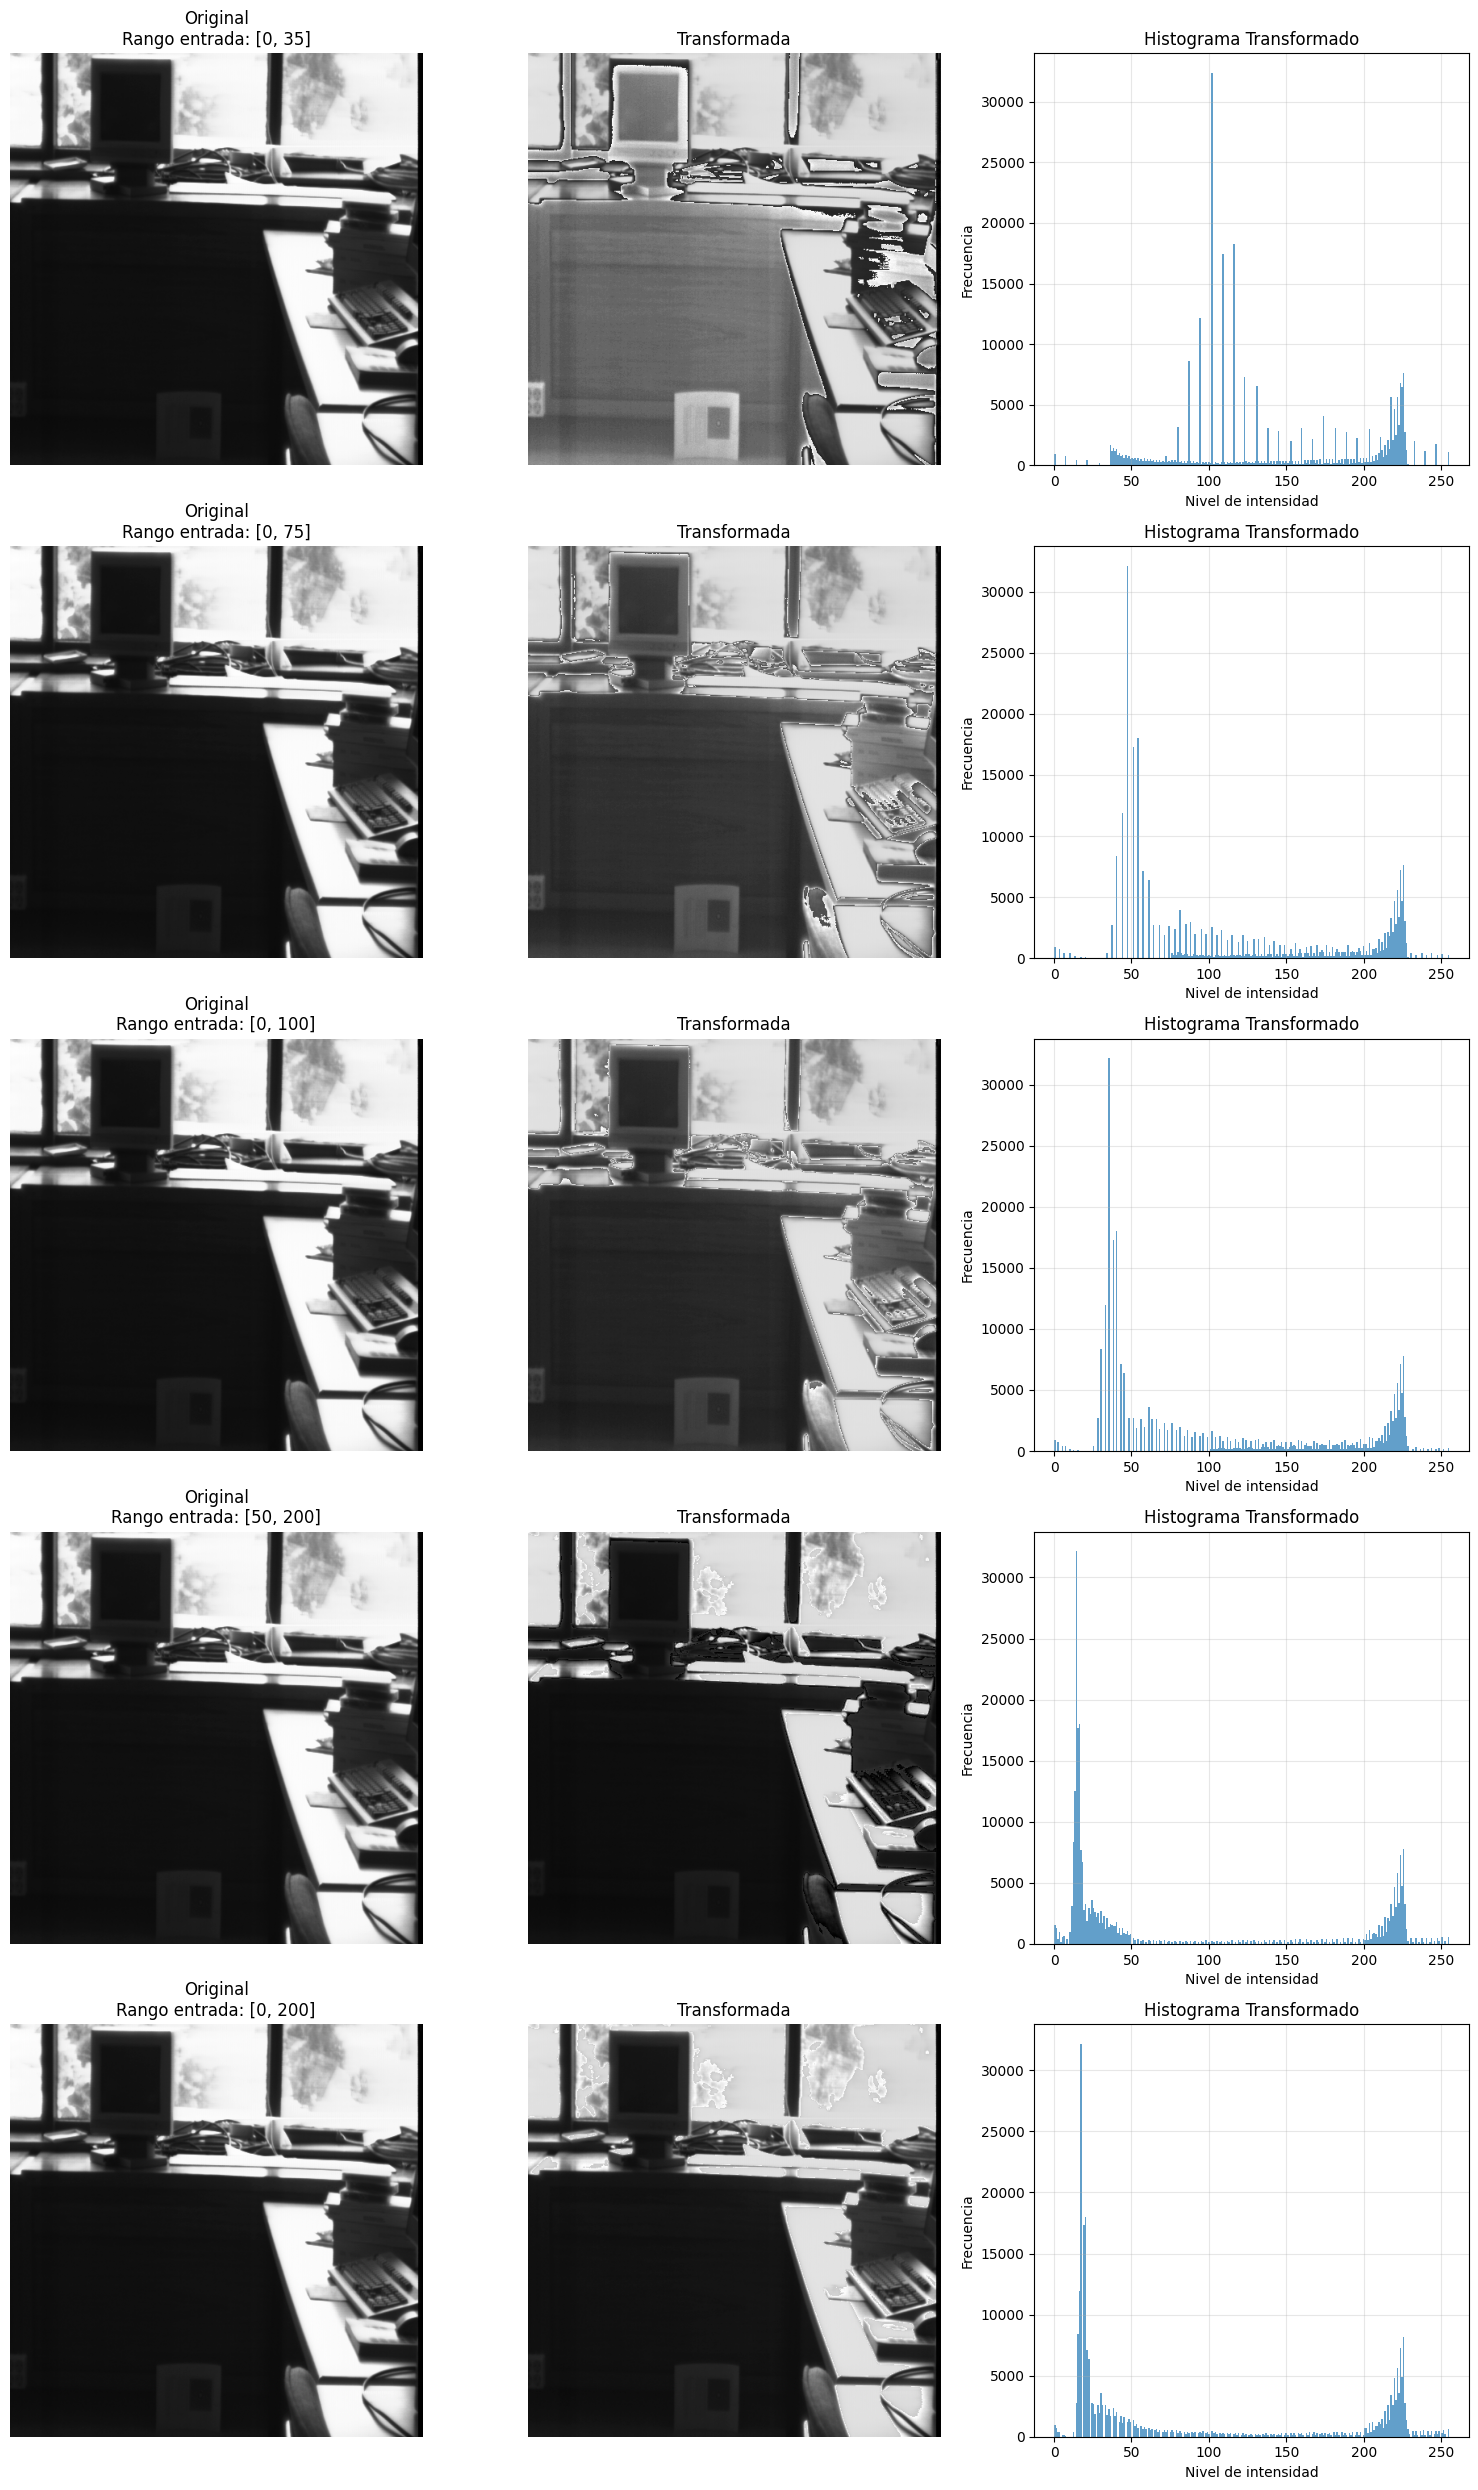

Mejor rango basado en observación


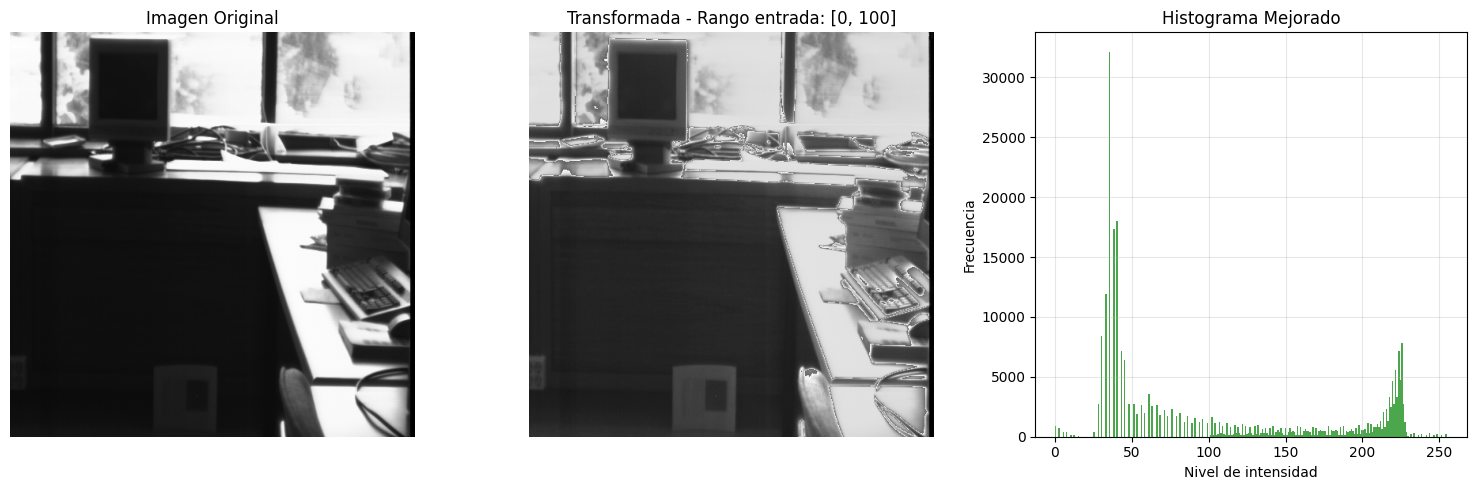

In [66]:
rangos_prueba = [
    [0, 35],
    [0, 75],
    [0, 100],   
    [50, 200],  
    [0, 200]    
]

fig, axes = plt.subplots(len(rangos_prueba), 3, figsize=(15, 5*len(rangos_prueba)))
axes = np.atleast_2d(axes)

for i, rango_entrada in enumerate(rangos_prueba):
    imagen_tr = tr_punt(imagen, rango_entrada, [0, 255]) #El rango de salida es siempr eel mismo porque lo dice el enunciado
    
    axes[i, 0].imshow(imagen, cmap='gray')
    axes[i, 0].set_title(f'Original\nRango entrada: {rango_entrada}')
    axes[i, 0].axis('off')
    
    axes[i, 1].imshow(imagen_tr, cmap='gray')
    axes[i, 1].set_title('Transformada')
    axes[i, 1].axis('off')
    

    axes[i, 2].hist(imagen_tr.flatten(), bins=256, range=(0, 255), alpha=0.7)
    axes[i, 2].set_title('Histograma Transformado')
    axes[i, 2].set_xlabel('Nivel de intensidad')
    axes[i, 2].set_ylabel('Frecuencia')
    axes[i, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


print("Mejor rango basado en observación")
mejor_rango = [0, 100]  # Basado en observación
imagen_mejorada = tr_punt(imagen, mejor_rango, [0, 255])

plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.imshow(imagen, cmap='gray')
plt.title('Imagen Original')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(imagen_mejorada, cmap='gray')
plt.title(f'Transformada - Rango entrada: {mejor_rango}')
plt.axis('off')

plt.subplot(1,3,3)
plt.hist(imagen_mejorada.flatten(), bins=256, range=(0,255), alpha=0.7, color='green')
plt.title('Histograma Mejorado')
plt.xlabel('Nivel de intensidad')
plt.ylabel('Frecuencia')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


**Ejercicio 3**: escribe una función ``eq_hist(img)``
que calcule la función de transformación puntual que ecualiza el histograma.
Aplica la función de transformación a la imagen anterior.
Calcula y muestra nuevamente el histograma y la imagen
resultantes, así como la función de transformación.

En este ejercicio tienes que implementar la función que ecualiza el histograma. No puedes usar funciones que lo hagan por ti, pero puedes usar la función de OpenCV [``equalizeHist``](https://docs.opencv.org/4.x/d6/dc7/group__imgproc__hist.html#ga7e54091f0c937d49bf84152a16f76d6e) para comprobar que tu resultado coincide.

Algunas funciones útiles para la implementación de la función:
- [np.histogram](https://numpy.org/doc/stable/reference/generated/numpy.histogram.html) para obtener un array numpy con el histograma de la imagen.
- [np.cumsum](https://numpy.org/doc/stable/reference/generated/numpy.cumsum.html) para calcular la suma acumulada del histograma.

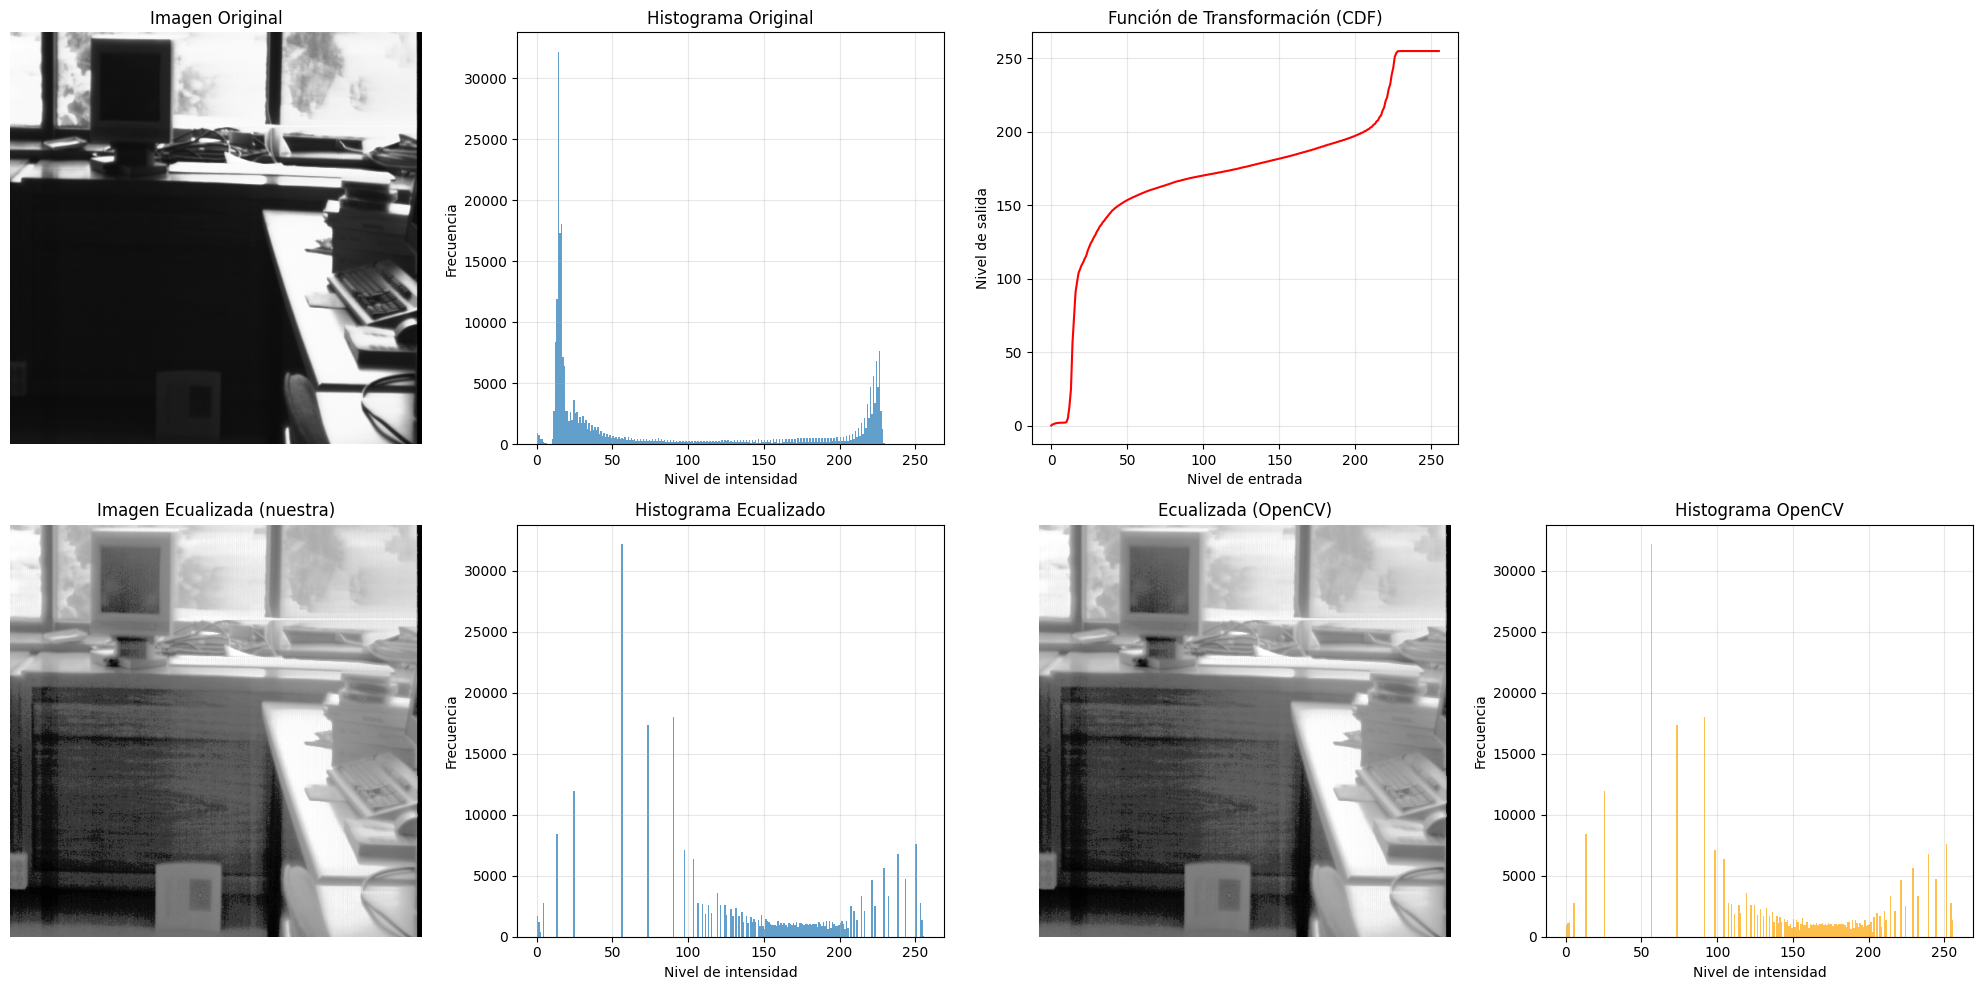

=== COMPARACIÓN CON OPENCV ===
Diferencia máxima: 1.0
Diferencia media: 0.5085
¿Coinciden exactamente? False

=== MEJORA EN REGIÓN INFERIOR IZQUIERDA ===
Contraste original: 3.52
Contraste ecualizado: 32.69
Mejora del contraste: 9.29x


In [67]:
def eq_hist(img):
    '''Ecualiza los niveles de gris de una imagen.'''
    hist, bins = np.histogram(img.flatten(), bins=256, range=[0, 256])
    
    cdf = hist.cumsum()
    
    cdf_normalized = (cdf - cdf.min()) * 255 / (cdf.max() - cdf.min()) # Normalizar
    
    img_eq = np.interp(img.flatten(), bins[:-1], cdf_normalized)
    
    img_eq = img_eq.reshape(img.shape).astype(np.uint8)
    
    return img_eq


imagen = cv2.imread('escilum.tif', cv2.IMREAD_GRAYSCALE)


imagen_eq = eq_hist(imagen)
imagen_eq_cv = cv2.equalizeHist(imagen)


hist_original = cv2.calcHist([imagen], [0], None, [256], [0, 256])
hist_eq = cv2.calcHist([imagen_eq], [0], None, [256], [0, 256])
hist_eq_cv = cv2.calcHist([imagen_eq_cv], [0], None, [256], [0, 256])

# Calcular la función de transformación 
cdf = hist_original.cumsum()
cdf_normalized = (cdf - cdf.min()) * 255 / (cdf.max() - cdf.min())


fig, axes = plt.subplots(2, 4, figsize=(20, 10))
# Original
axes[0, 0].imshow(imagen, cmap='gray')
axes[0, 0].set_title('Imagen Original')
axes[0, 0].axis('off')

axes[0, 1].hist(imagen.flatten(), bins=256, range=[0, 256], alpha=0.7)
axes[0, 1].set_title('Histograma Original')
axes[0, 1].set_xlabel('Nivel de intensidad')
axes[0, 1].set_ylabel('Frecuencia')
axes[0, 1].grid(True, alpha=0.3)

axes[0, 2].plot(cdf_normalized, color='red')
axes[0, 2].set_title('Función de Transformación (CDF)')
axes[0, 2].set_xlabel('Nivel de entrada')
axes[0, 2].set_ylabel('Nivel de salida')
axes[0, 2].grid(True, alpha=0.3)

axes[0, 3].axis('off') 

# Ecualizada 
axes[1, 0].imshow(imagen_eq, cmap='gray')
axes[1, 0].set_title('Imagen Ecualizada (nuestra)')
axes[1, 0].axis('off')

axes[1, 1].hist(imagen_eq.flatten(), bins=256, range=[0, 256], alpha=0.7)
axes[1, 1].set_title('Histograma Ecualizado')
axes[1, 1].set_xlabel('Nivel de intensidad')
axes[1, 1].set_ylabel('Frecuencia')
axes[1, 1].grid(True, alpha=0.3)

# Comparación con OpenCV
axes[1, 2].imshow(imagen_eq_cv, cmap='gray')
axes[1, 2].set_title('Ecualizada (OpenCV)')
axes[1, 2].axis('off')

axes[1, 3].hist(imagen_eq_cv.flatten(), bins=256, range=[0, 256], alpha=0.7, color='orange')
axes[1, 3].set_title('Histograma OpenCV')
axes[1, 3].set_xlabel('Nivel de intensidad')
axes[1, 3].set_ylabel('Frecuencia')
axes[1, 3].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Verificar si nuestra implementación coincide con OpenCV
diferencia = np.abs(imagen_eq.astype(np.float32) - imagen_eq_cv.astype(np.float32))
max_diferencia = np.max(diferencia)
mean_diferencia = np.mean(diferencia)

print(f"=== COMPARACIÓN CON OPENCV ===")
print(f"Diferencia máxima: {max_diferencia}")
print(f"Diferencia media: {mean_diferencia:.4f}")
print(f"¿Coinciden exactamente? {np.array_equal(imagen_eq, imagen_eq_cv)}")

# Mostrar mejora específica en la región inferior izquierda
region_original = imagen[imagen.shape[0]//2:, :imagen.shape[1]//2]
region_ecualizada = imagen_eq[imagen.shape[0]//2:, :imagen.shape[1]//2]

print(f"\n=== MEJORA EN REGIÓN INFERIOR IZQUIERDA ===")
print(f"Contraste original: {region_original.std():.2f}")
print(f"Contraste ecualizado: {region_ecualizada.std():.2f}")
print(f"Mejora del contraste: {region_ecualizada.std()/region_original.std():.2f}x")